In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
fpath = "/scratch/indikar_root/indikar1/cstansbu/pf-test/background/test.background.csv"

df = pd.read_csv(fpath)
t = pd.pivot_table(df, 
                    values=['mean', 'std'], 
                    index=['t', ], 
                    columns='c',)


t.columns = t.columns.to_flat_index()
t = t.reset_index(drop=False)

t.head()

,t,"(mean, 0)","(mean, 1)","(mean, 2)","(std, 0)","(std, 1)","(std, 2)"
0,0,0.006906,0.006907,0.006902,0.018773,0.018741,0.018733
1,1,0.007162,0.007174,0.007166,0.019190,0.019212,0.019170
2,2,0.006824,0.006827,0.006837,0.018494,0.018493,0.018494
3,3,0.006677,0.006686,0.006680,0.018127,0.018151,0.018120
4,4,0.006549,0.006537,0.006552,0.017848,0.017852,0.017847


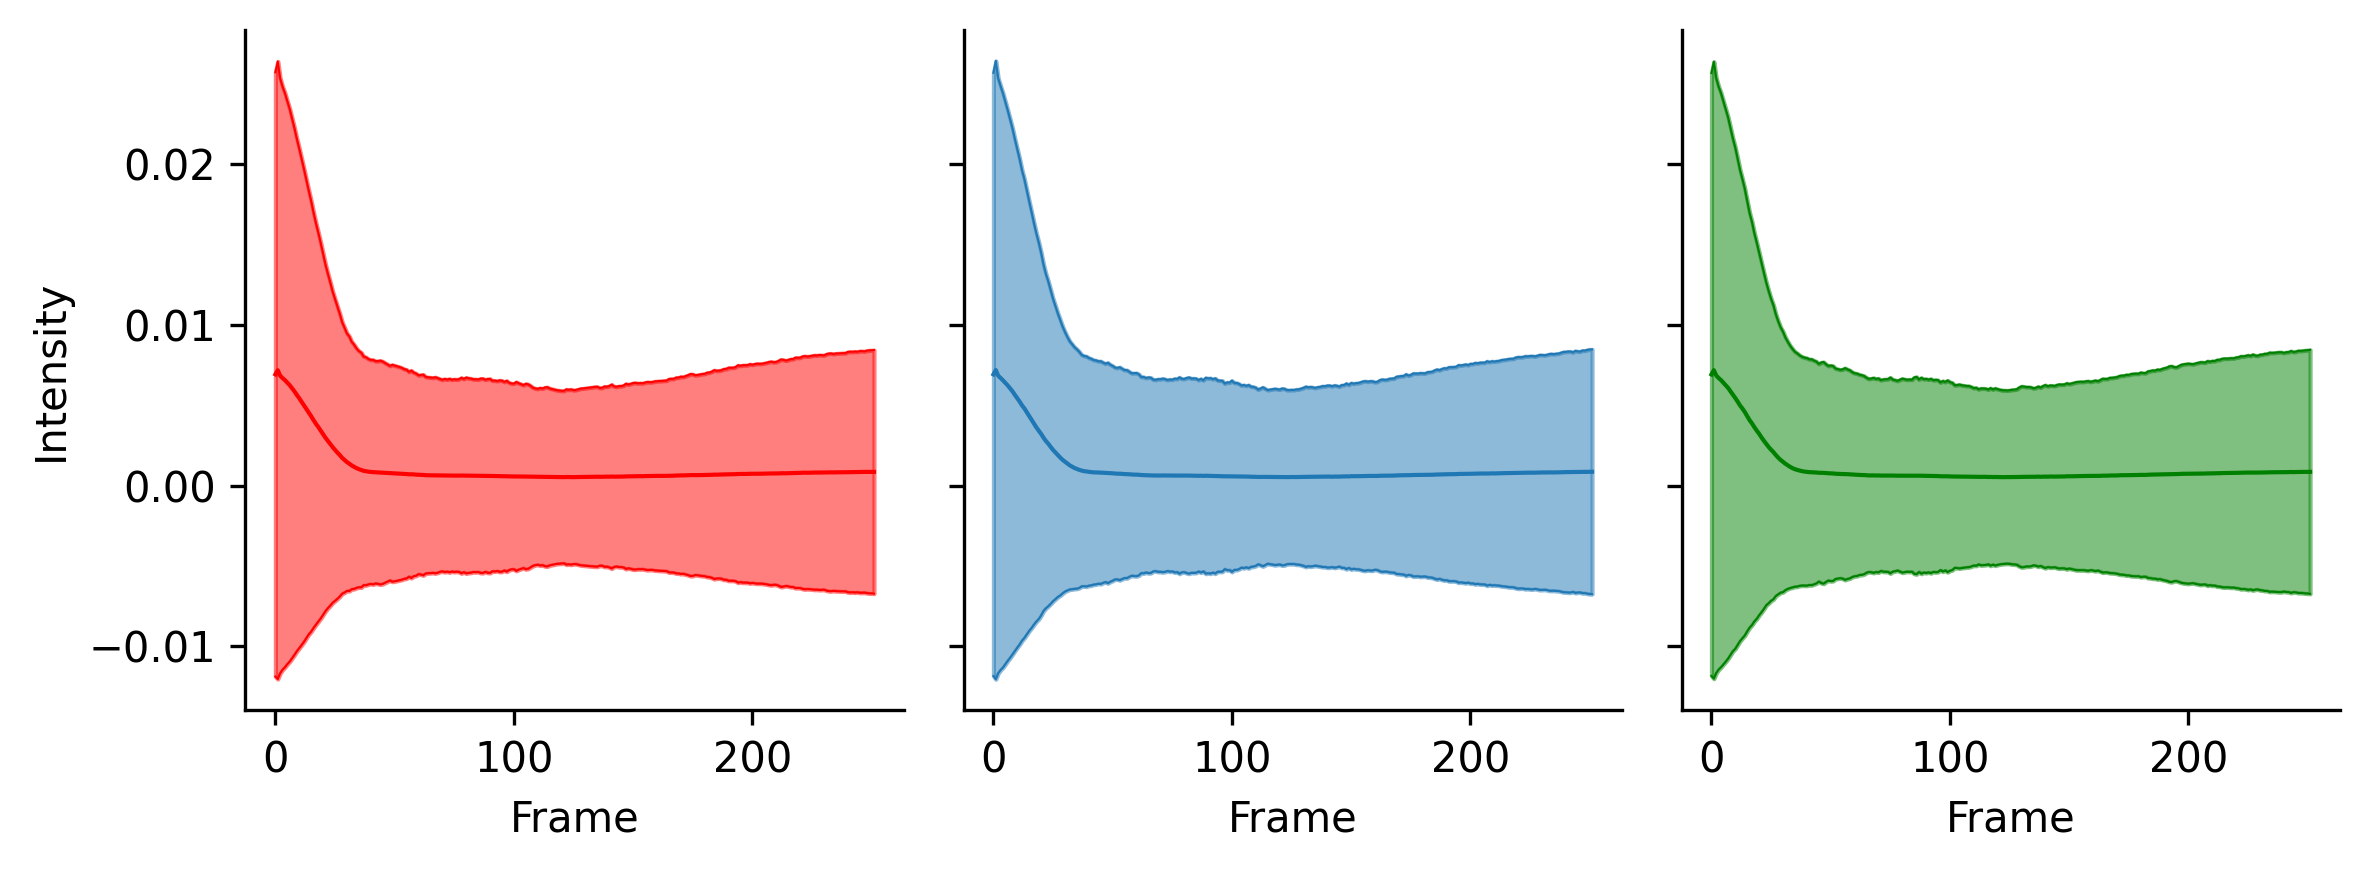

In [133]:


inten = t.copy()
tMax = inten['t'].max()


plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = int(1.5*np.log(tMax)), int(0.6 * np.log(tMax))
fig, axs = plt.subplots(1, 3, sharey=True)
axs = axs.ravel()

colors = {
        'nucleus' : 'C0',
        'red' : 'r',
        'green' : 'g',
    }
    
channelMapper = {1: 'C0', 0: 'r', 2: 'g'}

for k, v in channelMapper.items():
    time = inten['t'].to_list()
    mean = inten[("mean", k)].to_numpy()
    std = inten[("std", k)].to_numpy()
    
    ub = mean + std
    lb = mean - std
    
    axs[k].plot(time, mean, c=v, lw=1, zorder=2)
    axs[k].plot(time, ub, c=v, lw=0.5, zorder=1)
    axs[k].plot(time, lb, c=v, lw=0.5, zorder=1)
    
    axs[k].fill_between(time, ub, lb, 
                        color=v, 
                        alpha=0.5, 
                        zorder=0)

    axs[k].set_xlabel("Frame")
    if k == 0:
        axs[k].set_ylabel("Intensity")
    
plt.tight_layout()
sns.despine()
    

In [14]:
fpath = "/scratch/indikar_root/indikar1/cstansbu/pf-test/tracks/test.tracks.raw.csv"

tracks = pd.read_csv(fpath)
print(tracks.head())

fpath = "/scratch/indikar_root/indikar1/cstansbu/pf-test/segmentation/test.celldata.csv"

cells = pd.read_csv(fpath)
print(cells.head())

   ID  t            x           y    z  parent  root  state  generation   
0   1  0   355.972973  742.810811  0.0       1     1      5           0  \
1   1  1   357.095238  746.285714  0.0       1     1      5           0   
2   1  2   359.035714  748.107143  0.0       1     1      5           0   
3   2  0  1063.550000  697.900000  0.0       2     2      5           0   
4   2  1  1064.000000  699.340909  0.0       2     2      5           0   

   dummy  area  
0  False  37.0  
1  False  42.0  
2  False  28.0  
3  False  20.0  
4  False  44.0  
   area  area_convex  area_filled  axis_major_length  axis_minor_length   
0  36.0         39.0         36.0           7.897777           5.865398  \
1  44.0         49.0         44.0           8.176490           6.857189   
2  58.0         62.0         58.0          10.485276           7.084979   
3  41.0         46.0         41.0           8.424045           6.269982   
4  34.0         40.0         34.0           6.981752           6.338965 

In [26]:
fpath = "/scratch/indikar_root/indikar1/cstansbu/pf-test/segmentation/test.intensity_scores.csv"
scores = pd.read_csv(fpath)
scores.head()

,t,c,label,pval,logFoldChange,name
0,0,0,1,0.000495,0.011011,total
1,0,1,1,0.000496,0.011010,total
2,0,2,1,0.000494,0.011014,total
3,0,0,2,0.041286,0.002739,total
4,0,1,2,0.041309,0.002739,total


In [51]:
t = pd.pivot_table(scores, 
                   values=['pval', 'logFoldChange'], 
                   index=['t', 'label'], 
                   columns=['c', 'name',]).reset_index(drop=False)

t.columns  = t.columns.to_flat_index()

def renameCols(columns):
    newColumns = []
    for c in columns:
        if len(c) > 2:
            newColumns.append("_".join(list(c)))
        else:
            newColumns.append(c[0])
    return newColumns
        
    
# t.columns = [''.join(str(x)) for x in t.columns]
t.head()

,"(t, , )","(label, , )","(logFoldChange, 0, masked)","(logFoldChange, 0, total)","(logFoldChange, 1, masked)","(logFoldChange, 1, total)","(logFoldChange, 2, masked)","(logFoldChange, 2, total)","(pval, 0, masked)","(pval, 0, total)","(pval, 1, masked)","(pval, 1, total)","(pval, 2, masked)","(pval, 2, total)"
0,0,1,0.011321,0.011011,0.011216,0.011010,0.011081,0.011014,3.592691e-04,4.954987e-04,4.008669e-04,4.957046e-04,4.608794e-04,4.935511e-04
1,0,2,0.003050,0.002739,0.002945,0.002739,0.002810,0.002743,2.675846e-02,4.128604e-02,3.110030e-02,4.130857e-02,3.751887e-02,4.107306e-02
2,0,3,0.031368,0.031058,0.031263,0.031057,0.031128,0.031061,4.620400e-17,8.352582e-17,5.647411e-17,8.359024e-17,7.303513e-17,8.291734e-17
3,0,4,0.024195,0.023884,0.024090,0.023884,0.023955,0.023888,9.411413e-07,1.246781e-06,1.035420e-06,1.247237e-06,1.169902e-06,1.242468e-06
4,0,5,0.016703,0.016392,0.016598,0.016392,0.016463,0.016396,2.610134e-05,3.521312e-05,2.889796e-05,3.522681e-05,3.290945e-05,3.508371e-05


In [53]:

def renameCols(columns):
    newColumns = []
    for c in columns:
        if c[1] != "":
            newColumns.append(f"c{c[1]}_{c[0]}_{c[2]}")
        else:
            newColumns.append(c[0])
    return newColumns

renameCols(t.columns)

['t',
 'label',
 'c0_logFoldChange_masked',
 'c0_logFoldChange_total',
 'c1_logFoldChange_masked',
 'c1_logFoldChange_total',
 'c2_logFoldChange_masked',
 'c2_logFoldChange_total',
 'c0_pval_masked',
 'c0_pval_total',
 'c1_pval_masked',
 'c1_pval_total',
 'c2_pval_masked',
 'c2_pval_total']

In [25]:
def splitIntensityStats(cells):
    """A function to split intensity values (nested)
    into new columns """
    
    def parse(row):
        return row.replace("[", "").replace("]", "").split()
    
    INTEN_COLUMNS = [
        'intensity_max',
        'intensity_min', 
        'intensity_mean',
    ]
    
    for c in INTEN_COLUMNS:
        # convert to list explicitly
        cells[c] = cells[c].apply(lambda x: parse(x))        
        newCols = [f"c{i}_{c}" for i in range(3)]
        
        for ind, nc in enumerate(newCols):
            cells[nc] = cells[c].apply(lambda x: float(x[ind]))
        
    cells = cells.drop(INTEN_COLUMNS, axis=1)
    
    return cells
        
    # return cells


t = splitIntensityStats(cells.copy())

   area  area_convex  area_filled  axis_major_length  axis_minor_length   
0  36.0         39.0         36.0           7.897777           5.865398  \
1  44.0         49.0         44.0           8.176490           6.857189   
2  58.0         62.0         58.0          10.485276           7.084979   
3  41.0         46.0         41.0           8.424045           6.269982   
4  34.0         40.0         34.0           6.981752           6.338965   

   centroid_y   centroid_x  eccentricity   
0  856.750000  1013.166667      0.669664  \
1  883.727273   452.386364      0.544675   
2  778.224138   173.689655      0.737170   
3  607.780488  1009.756098      0.667850   
4  759.911765    67.588235      0.419115   

                                           intensity  label  ...  t   
0  [[[0.         0.         0.        ]\n  [0.   ...      1  ...  0  \
1  [[[0.         0.         0.        ]\n  [0.   ...      2  ...  0   
2  [[[0.00000000e+00 0.00000000e+00 0.00000000e+0...      3  ...  0   


In [4]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
cells['intensity_mean'].head(1)

In [ ]:
cells['intensity_max'].head(1).values[0].replace("[", "").replace("]", "").split()

In [ ]:
def mergeCellData(tracks, cells):
    """A function to merge track information with 
    cell information. Drops a few data intensive columns from
    cell data """
    
    # hand-picked columns
    CELL_COLUMNS = [
        'area', 
        'area_convex', 
        'area_filled', 
        'axis_major_length',
        'axis_minor_length', 
        'centroid_y', 
        'centroid_x', 
        'eccentricity',
        'intensity_max',
        'intensity_min', 
        'intensity_mean',
        'label',
        'orientation', 
        'perimeter',
        'solidity', 
        'circularity',
        't'
    ]
    
    cells = cells[CELL_COLUMNS]
    cells = cells.rename(columns={'centroid_x' : 'x',
                                  'centroid_y' : 'y'})
    
    # force datatypes
    mergeCols = {
        'x' : float,
        'y' : float,
        't' : int,
    }
    
    """SUPER IMPORTANT!! Tracks have zero-indexed
    time """
    
    for k, v in mergeCols.items():
        cells[k] = cells[k].astype(v)
        tracks[k] = tracks[k].astype(v)
        
        
    print(cells['t'].describe())
    print()
    print(tracks['t'].describe())
    
#     # merge with tracks based on position and time
#     tracks = pd.merge(tracks, cells, 
#                       how='left',
#                       left_on=list(mergeCols.keys()),
#                       right_on=list(mergeCols.keys()),)
    
#     return tracks


t = mergeCellData(tracks, cells)
t.head()

In [ ]:
cells['t'].head()

In [ ]:
df['trackLen'] = df.groupby('ID')['x'].count()

test = df[df['trackLen'] > 30]
test.shape

In [ ]:
rid = np.random.choice(test['ID'].unique(), 1)[0]

pdf = df[df['ID'] == rid]



sns.scatterplot(data=pdf, 
                x='x',
                y='y')

In [ ]:
t = df['intensity'].head(1).values[0]
t